# GDP Bar Chart Race

#### Importing Libraries

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#### Read the raw data

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data = raw_data[raw_data['Series Name']=='GDP (current US$)']
raw_data = raw_data.drop(columns=['Series Name', 'Series Code'])
print('Shape: '+str(raw_data.shape))
raw_data.head()

Shape: (217, 52)


,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
5642,Afghanistan,AFG,1748886595.55556,1831108971.11111,1595555475.55556,1733333264.44444,2155555497.77778,2366666615.55556,2555555566.66667,2953333417.77778,...,15856574731.4411,17804292964.1045,20001598505.7042,20561069558.2152,20484885119.7348,19907111418.9938,19362642266.6484,20191760000.0587,19484384936.6312,19101353832.7371
5643,Albania,ALB,..,..,..,..,..,..,..,..,...,11926928505.5231,12890765324.2256,12319830252.4768,12776217194.7928,13228144008.3428,11386846319.1589,11861200797.4707,13019693450.8816,15147020535.3869,15278077446.8643
5644,Algeria,DZA,4863487492.65763,5077222366.97472,6761786386.54713,8715105930.49101,13209713643.3219,15557934268.4965,17728347374.994,20971901273.271,...,161207754147.286,200019468616.453,209060307470.078,209754763860.68,213808808746.696,165979418301.861,160033844070.572,167389364980.671,173757952824.25,169988236398.126
5645,American Samoa,ASM,..,..,..,..,..,..,..,..,...,576000000,574000000,644000000,641000000,642000000,661000000,652000000,602000000,636000000,..
5646,Andorra,AND,78619206.0850963,89409820.3592814,113408231.944085,150820102.798401,186558696.279204,220127246.376812,227281024.620741,254020153.340635,...,3449966856.68832,3629203786.19154,3188808942.56713,3193704343.20627,3271808157.30039,2789870187.50693,2896679211.86628,3000180750.11297,3218316013.22626,3154057987.23833


#### Converting the Year columns into rows and cleaning the data

In [3]:
#Year Columns to rows
df = raw_data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP')
#Cleanig the year column into usable form 
df['Year'] = df['Year'].apply(lambda x: int(x[:(x.find('['))].replace(" ","")))
df['GDP'] = df['GDP'].apply(lambda x: float(x)/1000000000 if x != '..' else np.nan)
df['rank'] = df.groupby(['Year'])['GDP'].rank(ascending=False,method='first')
df = df.sort_values(by=['Year','rank'], ascending=True).reset_index(drop=True)
df.head()

,Country Name,Country Code,Year,GDP,rank
0,United States,USA,1970,1073.303000,1.0
1,Germany,DEU,1970,215.838448,2.0
2,Japan,JPN,1970,212.609188,3.0
3,France,FRA,1970,148.456360,4.0
4,United Kingdom,GBR,1970,130.671946,5.0


#### Filtering top 10 countries by GDP for each year

In [4]:
tdf = df[(df['Year']>=1970) & (df['rank']<=10)].reset_index(drop=True)

#### Writing the animation function

<IPython.core.display.Javascript object>


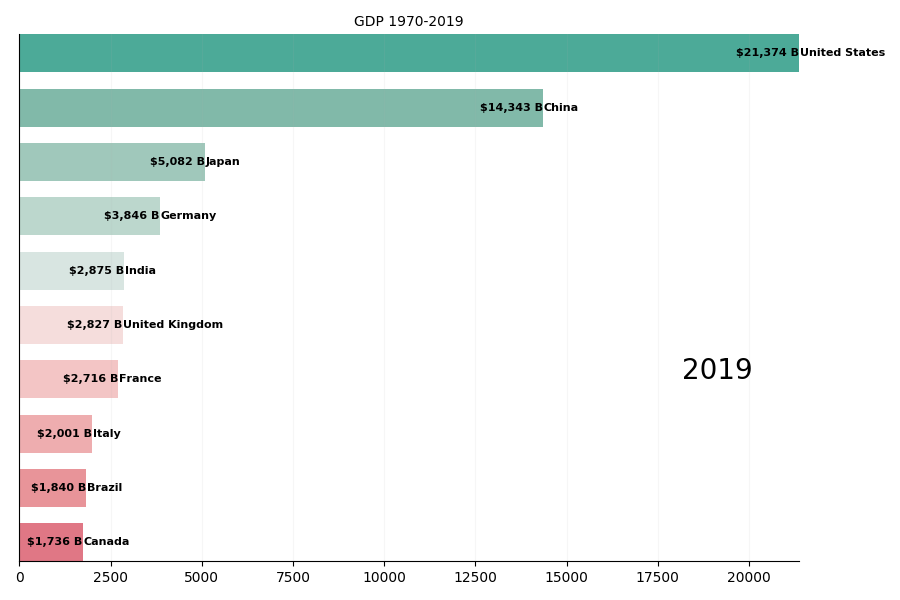

In [5]:
n = np.arange(min(tdf['Year']),max(tdf['Year'])+1,1)

scale=['#00876c','#4c9c85','#78b19f','#a0c6b9','#c8dbd5','#f1cfce','#eeadad','#e88b8d','#df676e','#d43d51']
cmap=dict(zip(np.arange(1,11,1),scale))    

def barh_update(curr):
    ax.clear()
    plt.barh(tdf['rank'][tdf['Year']==curr], tdf['GDP'][tdf['Year']==curr], height=0.7, alpha=0.7)
    plt.tick_params(axis='y', left=False, right=False, labelleft=False)
    plt.title(label="GDP 1970-2019", fontsize=10)
    plt.grid(which='major',axis='x',alpha=0.1)
    ax.invert_yaxis()
    ax.margins(x=0,y=0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    
    z=dict(zip(tdf['rank'][tdf['Year']==curr], tdf['Country Name'][tdf['Year']==curr]))
    
    rects = ax.get_children()[0:10]
    for i, rect in enumerate(rects):
        width = rect.get_width()
        ax.text(width-3, rect.get_y() + rect.get_height()/2, '${:,.0f} B'.format(width), ha='right', va='center', 
                    fontsize=8, fontweight='bold')   
        ax.text(width+15, rect.get_y() + rect.get_height()/2, z[i+1], ha='left', va='center', 
                    fontsize=8, fontweight='bold')
        rect.set_facecolor(cmap[i+1])
    ax.text(x=max(tdf['GDP'][tdf['Year']==curr]*0.85), y=7, s=str(curr), fontsize=20)    

    
fig, ax = plt.subplots(figsize=(9,6), tight_layout=True)        
z = animation.FuncAnimation(fig, barh_update, frames=n, interval=100, repeat=False)